# Import Libraries

In [49]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Import Data

In [4]:
# TO DO: Change path to your file

path = '/Users/leanderhuyghe/Documents/Tue/Data Challenge 2/Jan_2010_Oct_2021/2020-01/2020-01-avon-and-somerset-outcomes.csv'

df = pd.read_csv(path)
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,4f3b41b812aa26b62ccb530847ec0c0d931f3839dd6873...,2020-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect
1,be2d8acbbfe5835a42a70611a5167090f5d98a54c3d63d...,2020-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect
2,52af57e81f771ae44a89b358109fa30146dcee441ddc58...,2020-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No location,NaN,NaN,Suspect charged
3,d1e4fbc86bfd8f4e5d5c8cfb5bab4625f9fc32f0b3e60d...,2020-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect
4,fd29d28cecffca13a5b2f652ac85bded758b624ed45faf...,2020-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect


In [88]:
#filter out items with longitude/latitude is NaN

df = df[df['Longitude'].isnull() == False]
df = df[df['Latitude'].isnull() == False]

#This dataset had some outliers, I deleted them out of convenience

df = df[(df['Longitude']< -2) == True]
df = df[(df['Latitude'] < 52) == True]
df = df[(df['Latitude'] > 50.5) == True]
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
57,b31f1260218f3f9af25b642b7e786f0a4ee210ebc0caf0...,2020-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.589376,51.456017,On or near NEWGATE,E01014540,Bristol 032B,Suspect charged
77,b3fa927320f0377cc805ee6e25cfcc99a43b376c2355f2...,2020-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.623728,51.476942,On or near SAVILLE GATE CLOSE,E01014714,Bristol 015F,Further action is not in the public interest
90,72d160e9d666e10b7b4f277cc0b563fe4cfd2337287c88...,2020-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.852642,51.435766,On or near STATION ROAD,E01014750,North Somerset 007A,Suspect charged
94,f8b51ff9660d0d09ec72fde8231d6240dc28d54440ccce...,2020-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.570642,51.527880,On or near Pedestrian Subway,E01014952,South Gloucestershire 011G,Suspect charged
99,de972ce54a7162a29d4e7ca18eccf3b3f412e7e4d95c03...,2020-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.592148,51.456659,On or near Nightclub,E01014540,Bristol 032B,Suspect charged


In [69]:
#Create an array with longitude, latitude data

data = df.loc[:, ['Longitude', 'Latitude']]
X = data.values

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

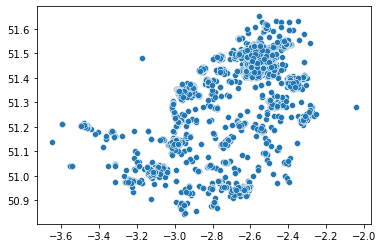

In [70]:
#Plot the data

sns.scatterplot(X[:,0], X[:,1])

# Clustering Algorithm

In [72]:
def calculate_distance(X, centroids, cluster):
     
    ''' 
    This function calculates the Cluster Sum of Squares. This is the squared average 
    of distance of all the points within a cluster to the cluster centroid
    '''

    sum = 0

    for i, val in enumerate(X): 
        sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
    
    return sum

In [83]:
def kmeans(X, k):
    ''' 
    Kmeans cluster algorithm that optimizes for smallest distance from centroid to points
    '''
    
    diff = 1

    cluster = np.zeros(X.shape[0])

    centroids = data.sample(n=k).values

    while diff:
     # for each observation
        for i, row in enumerate(X):
            mn_dist = float('inf')
        # dist of the point from all centroids
            for idx, centroid in enumerate(centroids):
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
                # store closest centroid
                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx
        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
        # if centroids are same then leave
        if np.count_nonzero(centroids-new_centroids) == 0:
            diff = 0
        else:
            centroids = new_centroids
    return centroids, cluster

In [84]:
# This is optional and not really applicable in our case but here we can see what effect a new cluster has on the distance within the clusters
distance_list = []
for k in range(1, 10):
    centroids, cluster = kmeans(X, k)
    # WCSS (Within cluster sum of square)
    cost = calculate_distance(X, centroids, cluster)
    distance_list.append(cost)

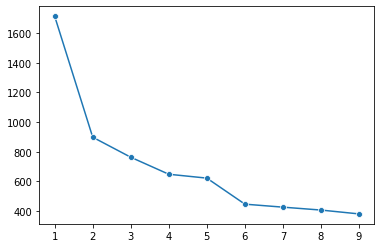

In [85]:
sns.lineplot(x = range(1,10), y=distance_list, marker ='o')
plt.show()

In [106]:
# Choose k and perform algorithm

k = 5
centroids, cluster = kmeans(X, k)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


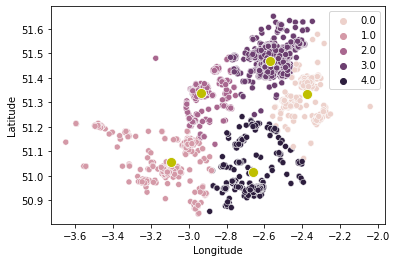

In [107]:
#Plot the data with the clusters

clustering_plot = sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
#Uncomment if you want to save the figure:
#fig = clustering_plot.get_figure()
#fig.savefig('Kmeans_Clustering.png')